# Student Lifestyle Analytics — Data Understanding

## 1. Setup

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option("display.max_columns", None)

## 2. Load Data

In [2]:
df = pd.read_csv("../data/raw/student_lifestyle_dataset.csv")
df.head()


,Student_ID,Study_Hours_Per_Day,Extracurricular_Hours_Per_Day,Sleep_Hours_Per_Day,Social_Hours_Per_Day,Physical_Activity_Hours_Per_Day,GPA,Stress_Level
0,1,6.9,3.8,8.7,2.8,1.8,2.99,Moderate
1,2,5.3,3.5,8.0,4.2,3.0,2.75,Low
2,3,5.1,3.9,9.2,1.2,4.6,2.67,Low
3,4,6.5,2.1,7.2,1.7,6.5,2.88,Moderate
4,5,8.1,0.6,6.5,2.2,6.6,3.51,High


## 3. Structure & Basic Info

In [3]:
df.info()
df.describe(include="all").T

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 8 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Student_ID                       2000 non-null   int64  
 1   Study_Hours_Per_Day              2000 non-null   float64
 2   Extracurricular_Hours_Per_Day    2000 non-null   float64
 3   Sleep_Hours_Per_Day              2000 non-null   float64
 4   Social_Hours_Per_Day             2000 non-null   float64
 5   Physical_Activity_Hours_Per_Day  2000 non-null   float64
 6   GPA                              2000 non-null   float64
 7   Stress_Level                     2000 non-null   object 
dtypes: float64(6), int64(1), object(1)
memory usage: 125.1+ KB


,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Student_ID,2000.0,NaN,NaN,NaN,1000.5,577.494589,1.0,500.75,1000.5,1500.25,2000.0
Study_Hours_Per_Day,2000.0,NaN,NaN,NaN,7.4758,1.423888,5.0,6.3,7.4,8.7,10.0
Extracurricular_Hours_Per_Day,2000.0,NaN,NaN,NaN,1.9901,1.155855,0.0,1.0,2.0,3.0,4.0
Sleep_Hours_Per_Day,2000.0,NaN,NaN,NaN,7.50125,1.460949,5.0,6.2,7.5,8.8,10.0
Social_Hours_Per_Day,2000.0,NaN,NaN,NaN,2.70455,1.688514,0.0,1.2,2.6,4.1,6.0
Physical_Activity_Hours_Per_Day,2000.0,NaN,NaN,NaN,4.3283,2.51411,0.0,2.4,4.1,6.1,13.0
GPA,2000.0,NaN,NaN,NaN,3.11596,0.298674,2.24,2.9,3.11,3.33,4.0
Stress_Level,2000,3,High,1029,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## 4. Summary Statistics

In [6]:
numeric_cols = [
    "Study_Hours_Per_Day",
    "Sleep_Hours_Per_Day",
    "Social_Hours_Per_Day",
    "Extracurricular_Hours_Per_Day",
    "Physical_Activity_Hours_Per_Day",
    "GPA"
]

In [7]:
print(df[numeric_cols].describe().T)
print("\nStress Level distribution (%)")
print(df["Stress_Level"].value_counts(normalize=True) * 100)

                                  count     mean       std   min  25%   50%  \
Study_Hours_Per_Day              2000.0  7.47580  1.423888  5.00  6.3  7.40   
Sleep_Hours_Per_Day              2000.0  7.50125  1.460949  5.00  6.2  7.50   
Social_Hours_Per_Day             2000.0  2.70455  1.688514  0.00  1.2  2.60   
Extracurricular_Hours_Per_Day    2000.0  1.99010  1.155855  0.00  1.0  2.00   
Physical_Activity_Hours_Per_Day  2000.0  4.32830  2.514110  0.00  2.4  4.10   
GPA                              2000.0  3.11596  0.298674  2.24  2.9  3.11   

                                  75%   max  
Study_Hours_Per_Day              8.70  10.0  
Sleep_Hours_Per_Day              8.80  10.0  
Social_Hours_Per_Day             4.10   6.0  
Extracurricular_Hours_Per_Day    3.00   4.0  
Physical_Activity_Hours_Per_Day  6.10  13.0  
GPA                              3.33   4.0  

Stress Level distribution (%)
Stress_Level
High        51.45
Moderate    33.70
Low         14.85
Name: proportion, dtype: f

## 5. Distributions

- Histograms for GPA, StudyHours, SleepHours, etc.

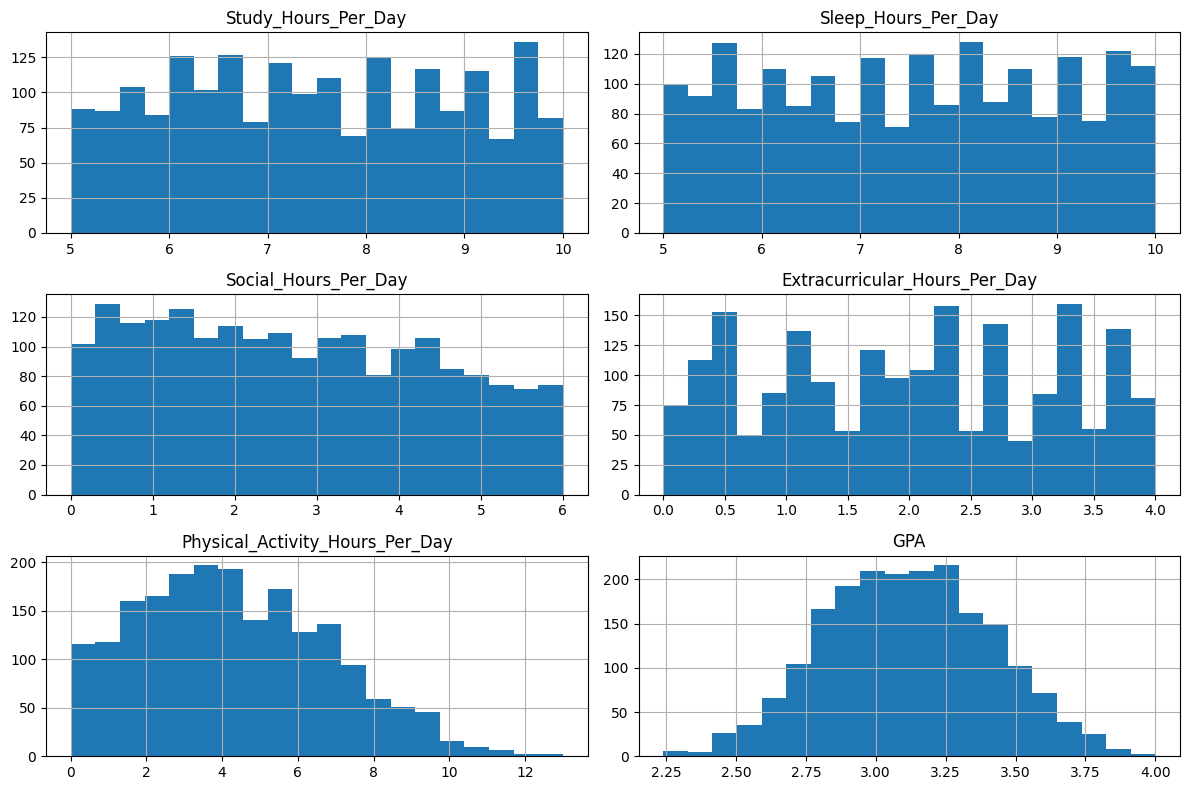

In [8]:
numeric_cols = ["Study_Hours_Per_Day","Sleep_Hours_Per_Day",
                "Social_Hours_Per_Day","Extracurricular_Hours_Per_Day",
                "Physical_Activity_Hours_Per_Day","GPA"]

df[numeric_cols].hist(figsize=(12,8), bins=20)
plt.tight_layout()
plt.show()

- Boxplots to spot outliers:

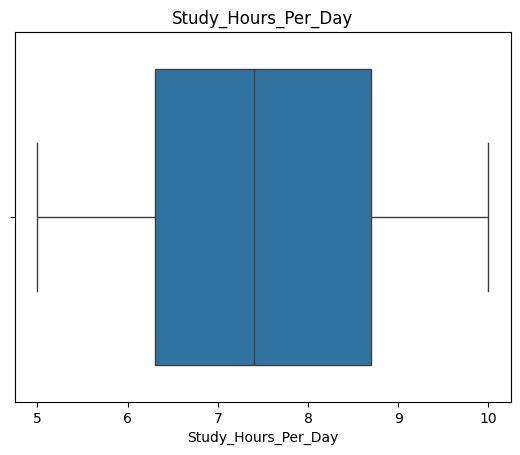

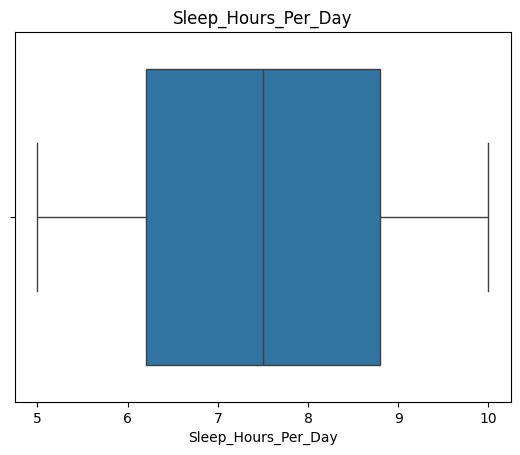

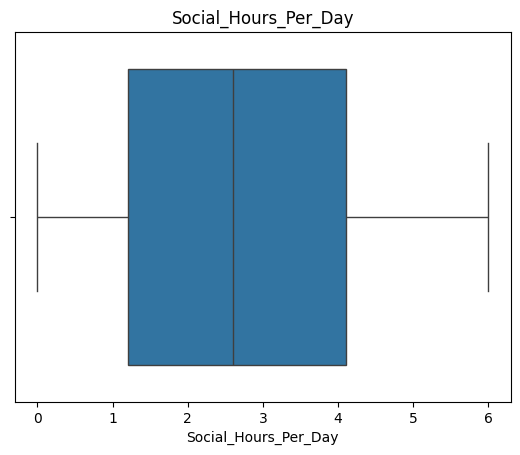

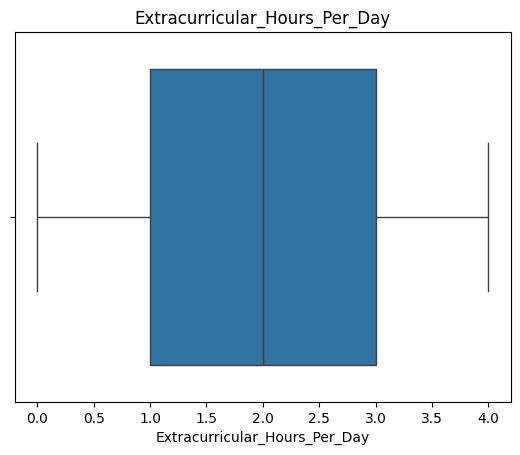

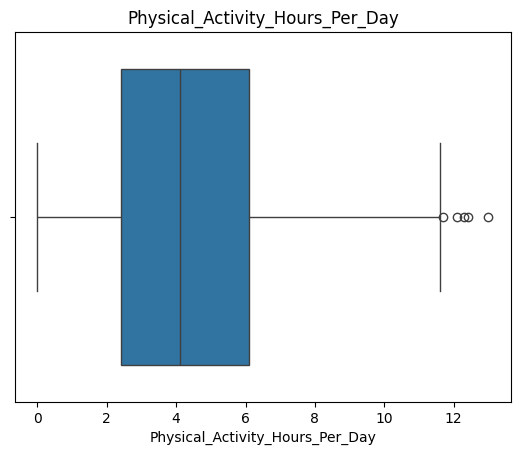

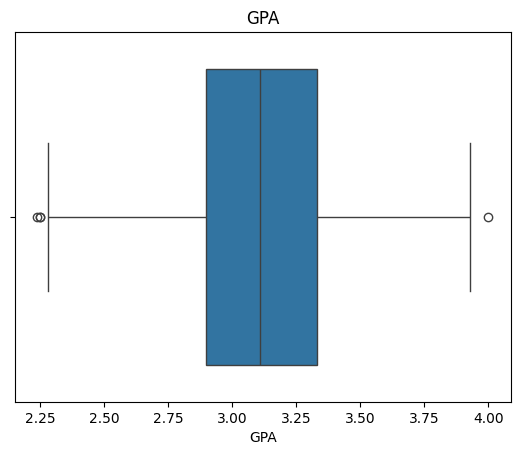

In [9]:
for col in numeric_cols:
    sns.boxplot(x=df[col])
    plt.title(col)
    plt.show()

## 6. Correlations

- Heatmap for numeric features vs GPA.

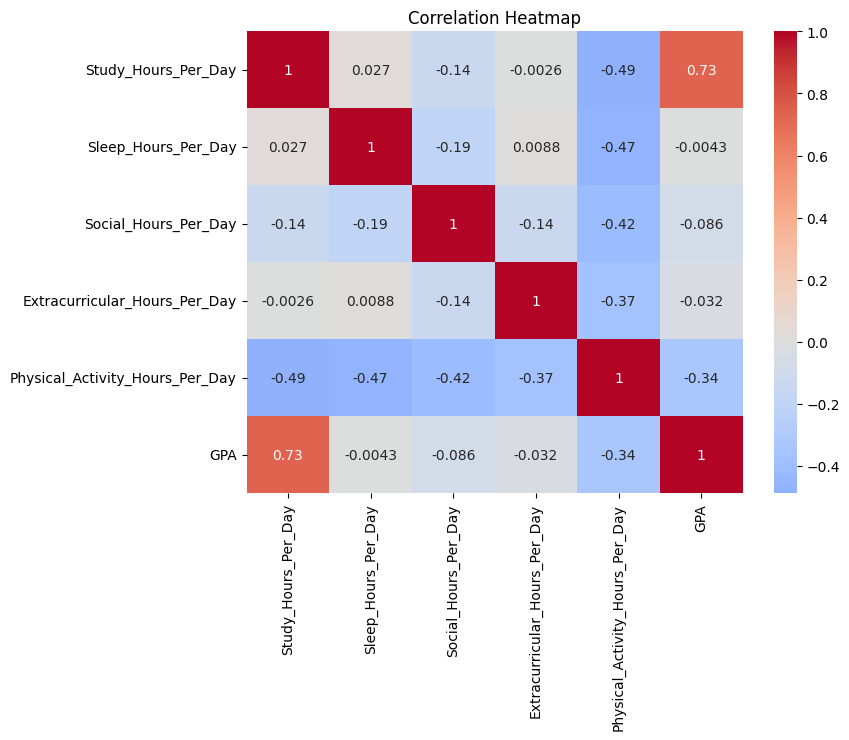

In [10]:
corr = df[numeric_cols].corr()
plt.figure(figsize=(8,6))
sns.heatmap(corr, annot=True, cmap="coolwarm", center=0)
plt.title("Correlation Heatmap")
plt.show()

Pay attention to:
- Positive: study, sleep, physical
- Negative: stress, excessive socializing

## 7. Group Comparisons

- GPA by Stress Level:

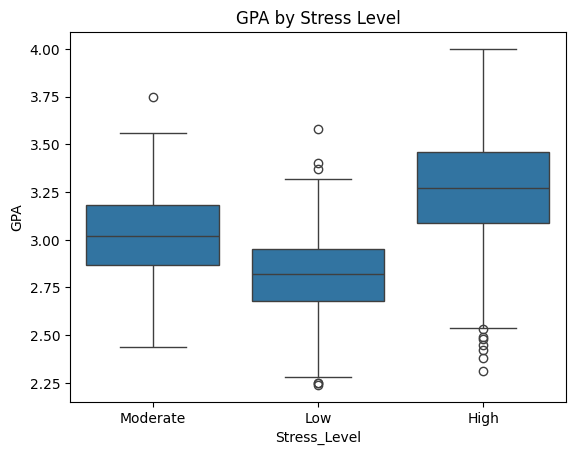

In [11]:
sns.boxplot(x="Stress_Level", y="GPA", data=df)
plt.title("GPA by Stress Level")
plt.show()

- Top vs bottom quartile (using pd.qcut):

In [12]:
df["GPA_Quartile"] = pd.qcut(df["GPA"], 4, labels=["Q1_lowest","Q2","Q3","Q4_highest"])
df.groupby("GPA_Quartile")[numeric_cols].mean()

C:\Users\paulm\AppData\Local\Temp\ipykernel_17928\2751301007.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby("GPA_Quartile")[numeric_cols].mean()


,Study_Hours_Per_Day,Sleep_Hours_Per_Day,Social_Hours_Per_Day,Extracurricular_Hours_Per_Day,Physical_Activity_Hours_Per_Day,GPA
GPA_Quartile,,,,,,
Q1_lowest,6.141233,7.616570,2.864162,2.010983,5.367052,2.742717
Q2,7.039034,7.415292,2.867807,2.083903,4.593964,3.016036
Q3,7.933065,7.364718,2.588710,1.916532,4.196976,3.223206
Q4_highest,8.875205,7.604918,2.486270,1.947131,3.086475,3.505676


## 8. Save Cleaned Dataset

- Save for later steps (Power BI + modeling).

In [13]:
df.to_csv("../data/interim/student_lifestyle_clean.csv", index=False)